In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('F:\\user\\Desktop\\Bengaluru_House_Data.csv')

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df1 = df.drop(['availability','society','area_type','balcony'],axis=1)

In [11]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df1['bhk'] = df1['size'].astype(str).apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[0].isdigit() else None)

In [14]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [15]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
len(df1.total_sqft.unique())

2117

In [17]:
def is_float(x):
    try :
        float(x)
    except:
        return False
    return True

In [18]:
df1[~df1.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3.0
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2.0
13240,Devanahalli,1 BHK,1020 - 1130,NaN,52.570,1.0
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2.0


In [19]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [20]:
df1.total_sqft = df1.total_sqft.apply(convert)

In [21]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [22]:
df1.isnull().sum()

location       1
size          16
total_sqft    46
bath          73
price          0
bhk           16
dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13304 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [24]:
df2=df1.dropna()

In [25]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [26]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [27]:
df2.shape

(13200, 6)

In [28]:
df2.drop('size',axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10580\986103266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('size',axis=1,inplace=True)


In [30]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [31]:
df2.location.value_counts().sort_values(ascending=True)

location
Abshot Layout               1
Shanthi Pura                1
Panathur Road,              1
Annasandrapalya             1
MEI layout, Bagalgunte      1
                         ... 
Thanisandra               232
Kanakpura Road            264
Electronic City           302
Sarjapur  Road            392
Whitefield                532
Name: count, Length: 1298, dtype: int64

In [32]:
df3 = df2.copy()

In [33]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [34]:
df3['price_per_sqft'] = df3.price*100000 / df3.total_sqft

In [35]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [36]:
len(df3.location.unique())

1298

In [37]:
df3.location=df3.location.apply(lambda x: x.strip())

In [38]:
locations=df3.location.value_counts().sort_values()

In [39]:
len(locations[locations <= 10])

1047

In [40]:
locations_less_than_10 = locations[locations <= 10]

In [41]:
locations_less_than_10

location
Abshot Layout                            1
Kengeri Satellite Town KHB Apartment     1
Hanuman Nagar                            1
Chuchangatta Colony                      1
Electronic City Phase 1,                 1
                                        ..
Sadashiva Nagar                         10
Kalkere                                 10
Dodsworth Layout                        10
Nagadevanahalli                         10
Dairy Circle                            10
Name: count, Length: 1047, dtype: int64

In [42]:
df4 = df3.copy()

In [43]:
df4.location= df3.location.apply(lambda x: 'others' if x in locations_less_than_10 else x)

In [44]:
df4.location.value_counts().sort_values()

location
Kodigehalli             11
Banjara Layout          11
Pattandur Agrahara      11
LB Shastri Nagar        11
Nehru Nagar             11
                      ... 
Kanakpura Road         264
Electronic City        304
Sarjapur  Road         392
Whitefield             533
others                2872
Name: count, Length: 241, dtype: int64

In [45]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [46]:
df4[df4['bhk']==43]

,location,total_sqft,bath,price,bhk,price_per_sqft
4684,Munnekollal,2400.0,40.0,660.0,43.0,27500.0


In [47]:
df4[df4.total_sqft/df4.bhk < 300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8.0,6296.296296
70,others,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...
13277,others,1400.0,7.0,218.0,7.0,15571.428571
13279,others,1200.0,5.0,130.0,6.0,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5.0,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5.0,9043.927649


In [48]:
df4.shape

(13200, 6)

In [49]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]

In [50]:
df5.shape

(12456, 6)

In [51]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: xlabel='total_sqft', ylabel='price_per_sqft'>

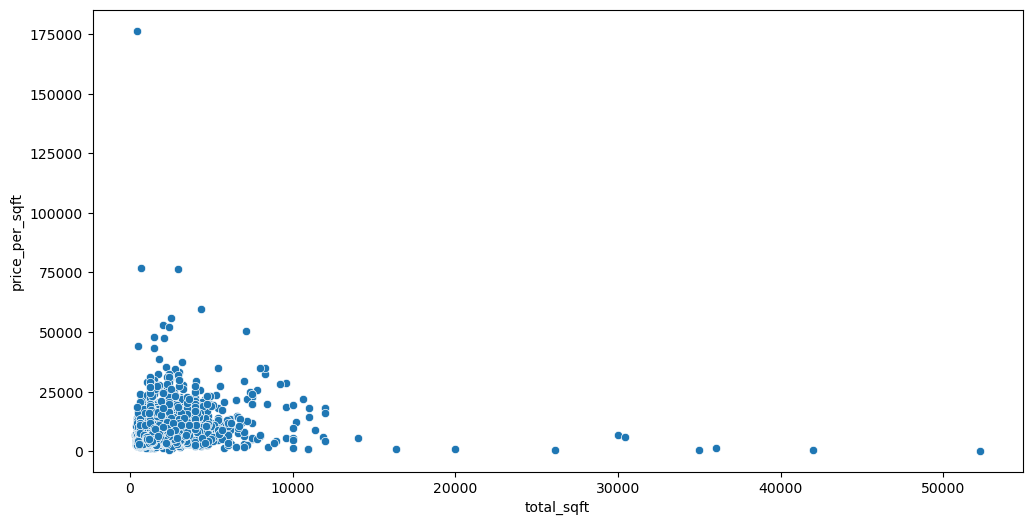

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df5,x='total_sqft',y='price_per_sqft')

In [53]:
df5[df5.total_sqft==df5.total_sqft.max()]

,location,total_sqft,bath,price,bhk,price_per_sqft
1894,others,52272.0,2.0,140.0,3.0,267.829813


In [54]:
df5.price_per_sqft.min()

267.82981328435875

In [55]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [56]:
df6=remove_outliers(df5)

In [57]:
df6.shape

(10242, 6)

<Axes: xlabel='total_sqft', ylabel='price_per_sqft'>

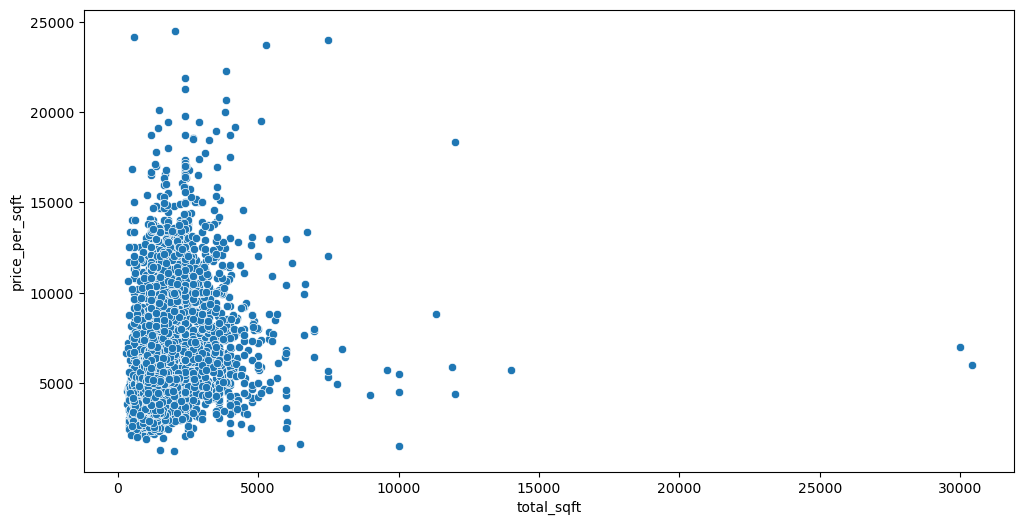

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df6,x='total_sqft',y='price_per_sqft')

In [59]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [60]:
df6[df6.bath > df6.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8408,others,11338.0,9.0,1000.0,6.0,8819.897689


In [61]:
len(df6[df6.bath > df6.bhk+2])

4

In [62]:
df7=df6[df6.bath < df6.bhk+2]

In [63]:
df7.shape

(10148, 6)

In [64]:
df8=df7.drop('price_per_sqft',axis=1)

In [65]:
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [66]:
dummis=pd.get_dummies(df8.location).astype(int)

In [67]:
df9= pd.concat([df8,dummis],axis=1)

In [68]:
df9.drop('location',inplace=True,axis=1)

In [69]:
df9.shape

(10148, 245)

In [70]:
X=df9.drop('price',axis=1)
y=df9.price

In [71]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred=lr.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [104]:
print('r2_score',r2_score(y_pred,y_test))

r2_score 0.8010497800401615


In [105]:
lr.score(X_test,y_test)

0.8103177355925288